In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/kaggle/input/cell-phone-price/CellPhone_train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df=pd.DataFrame(data)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [7]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.drop(['px_height', 'px_width', 'sc_h', 'sc_w', 'm_dep'], axis=1, inplace=True)

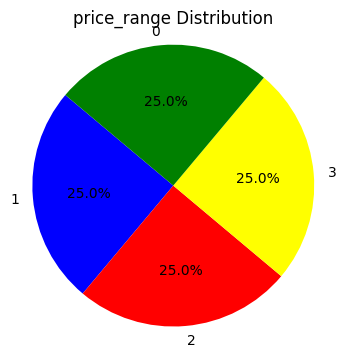

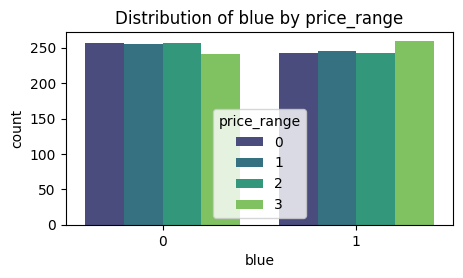

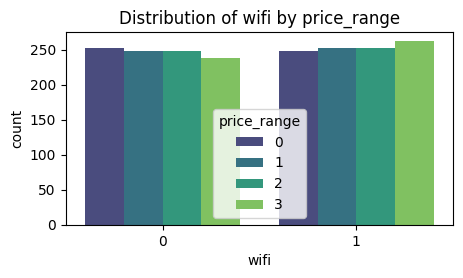

In [10]:
price_range_counts = df['price_range'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red' , 'yellow','green'])
plt.title('price_range Distribution')
plt.axis('equal')  
plt.show()

categorical_features = [ 'blue', 'wifi']
for feature in categorical_features:
    plt.figure(figsize=(5, 2.5))
    sns.countplot(x=feature, hue='price_range', data=df, palette='viridis')
    plt.title(f'Distribution of {feature} by price_range')
    plt.show()



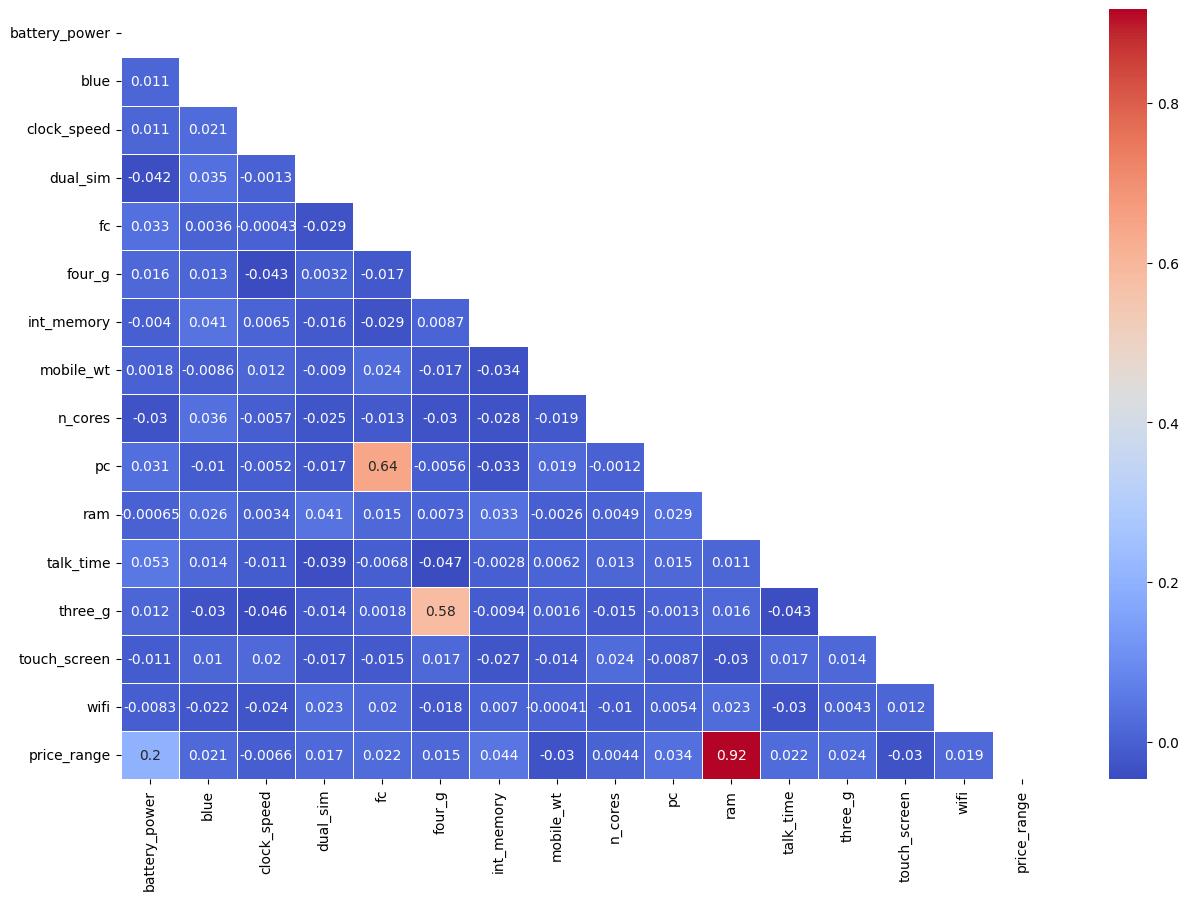

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True,linewidth=.5,cmap="coolwarm",mask=np.triu(df.corr(numeric_only=True)));

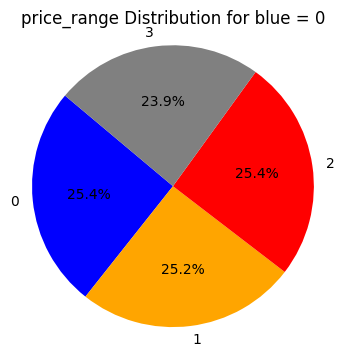

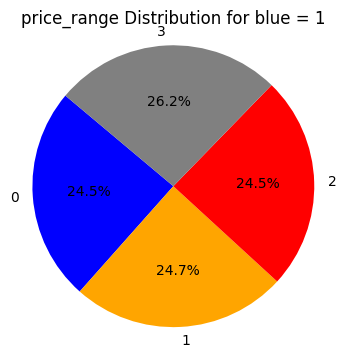

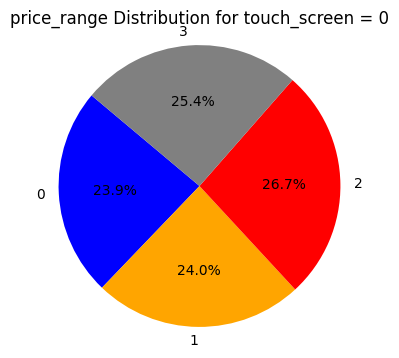

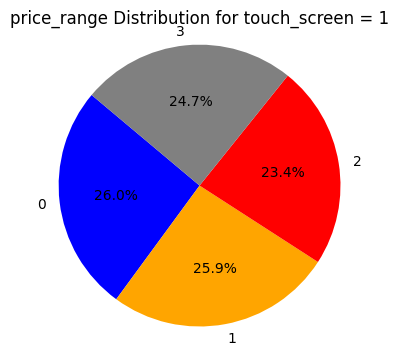

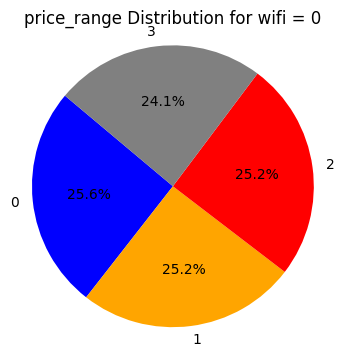

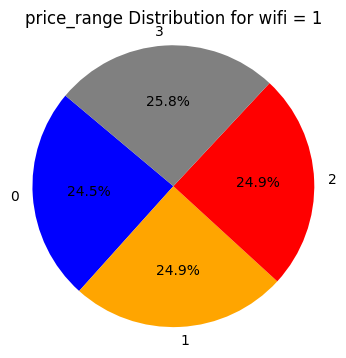

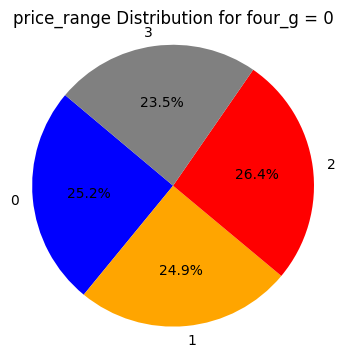

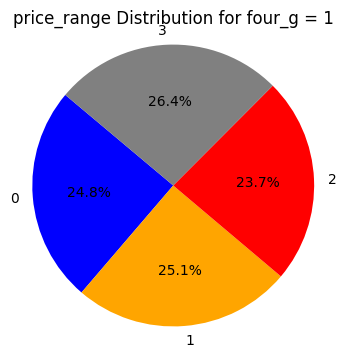

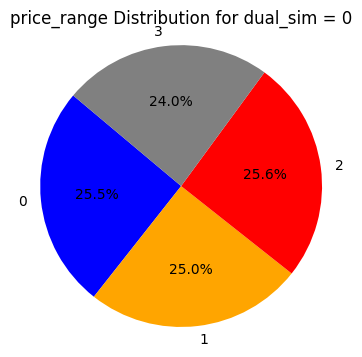

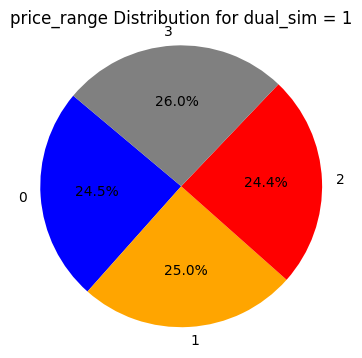

In [12]:
categorical_features = ['blue','touch_screen', 'wifi' , 'four_g' , 'dual_sim']


for feature in categorical_features:
    
    feature_price_range = df.groupby([feature, 'price_range']).size().unstack().fillna(0)
    

    for level in feature_price_range.index:
        plt.figure(figsize=(4, 4))
        plt.pie(feature_price_range.loc[level], labels=feature_price_range.columns, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange' , 'red' , 'gray'])
        plt.title(f'price_range Distribution for {feature} = {level}')
        plt.axis('equal') 
        plt.show()

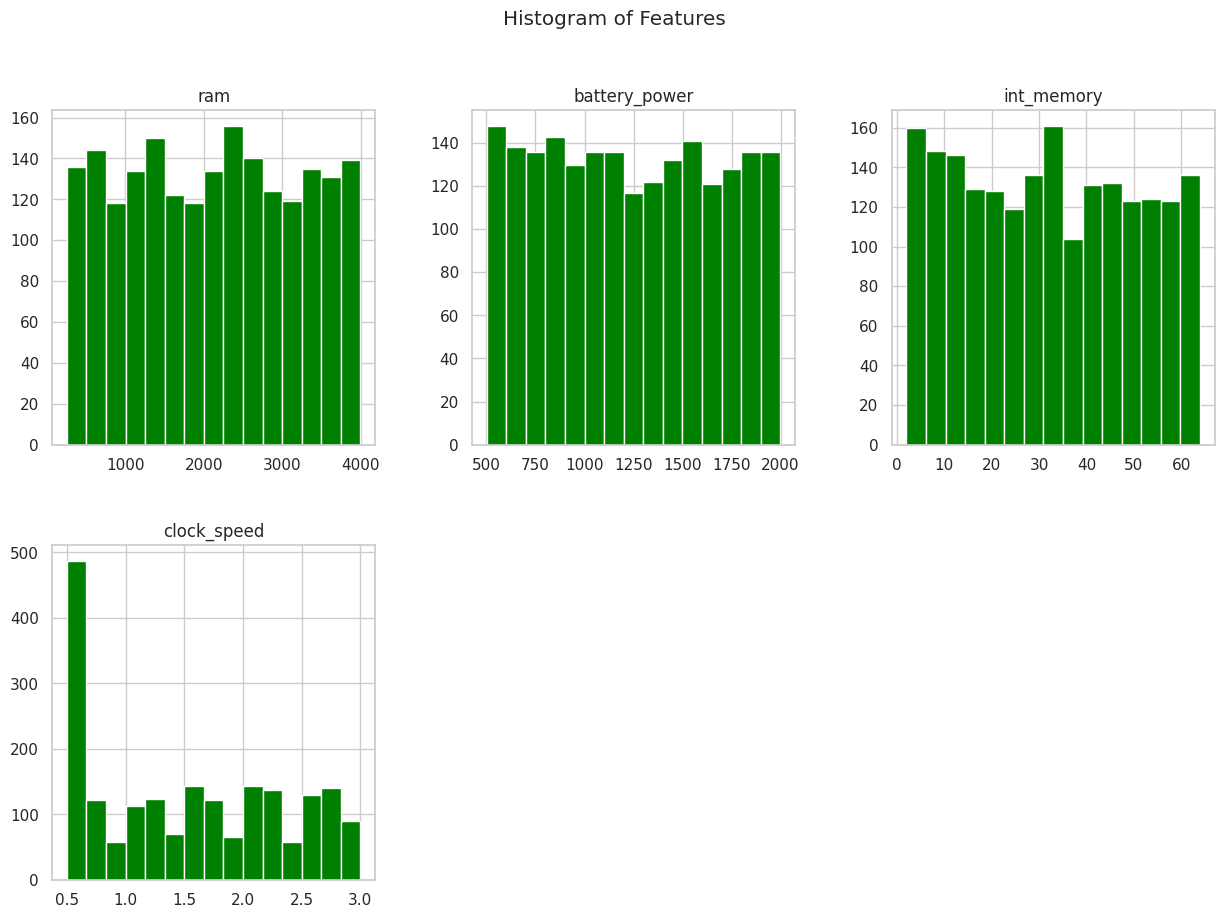

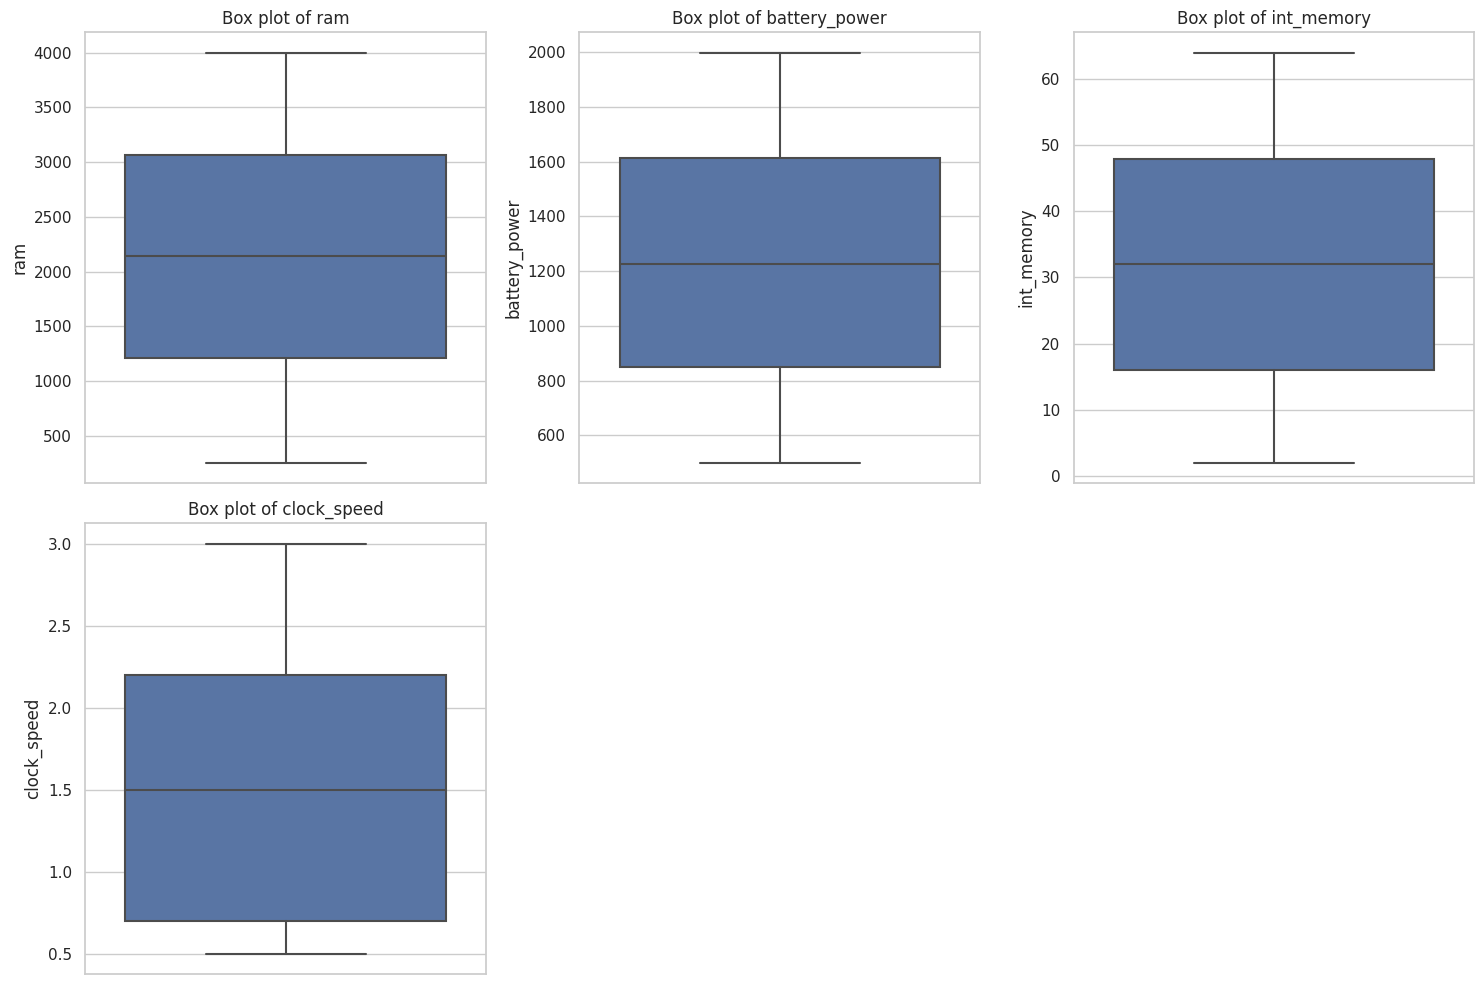

In [13]:
sns.set(style="whitegrid")

features1 = ['ram', 'battery_power', 'int_memory' , 'clock_speed']
df[features1].hist(bins=15, figsize=(15, 10), layout=(2, 3) ,  color='green')
plt.suptitle('Histogram of Features')
plt.show()


plt.figure(figsize=(15, 10))
for i, feature in enumerate(features1, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()


In [14]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,2,2549,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,136,3,6,2631,7,1,1,0,2
2,563,1,0.5,1,2,1,41,145,5,6,2603,9,1,1,0,2
3,615,1,2.5,0,0,0,10,131,6,9,2769,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,141,2,14,1411,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,106,6,14,668,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,187,4,3,2032,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,108,8,3,3057,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,145,5,5,869,19,1,1,1,0


# Model Building without Hyperparameter Tuning(best result for random forest with 80%)

In [15]:
X = df.drop('price_range', axis=1)
y = df['price_range']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)



# Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

# Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# SVM
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

Decision Tree Accuracy: 0.75
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        95
           1       0.68      0.64      0.66        92
           2       0.63      0.63      0.63        99
           3       0.83      0.83      0.83       114

    accuracy                           0.75       400
   macro avg       0.74      0.75      0.74       400
weighted avg       0.75      0.75      0.75       400

Random Forest Accuracy: 0.805
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        95
           1       0.71      0.73      0.72        92
           2       0.72      0.59      0.65        99
           3       0.85      0.94      0.89       114

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.81      0.80       

# using Grid Search to perform hyperparameter tuning(best result for svm with 83%)

In [16]:
X = df.drop('price_range', axis=1)
y = df['price_range']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Decision Tree
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
dt_pred = dt_best.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Best Parameters:", dt_grid.best_params_)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

# Random Forest
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=0), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(random_state=0), svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
svm_pred = svm_best.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Best Parameters:", svm_grid.best_params_)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

# Compare Models
accuracies = {'Decision Tree': dt_accuracy, 'Random Forest': rf_accuracy, 'SVM': svm_accuracy}
best_model = max(accuracies, key=accuracies.get)
print("Best Model:", best_model, "with accuracy:", accuracies[best_model])

Decision Tree Best Parameters: {'max_depth': None, 'min_samples_split': 10}
Decision Tree Accuracy: 0.76
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        95
           1       0.67      0.68      0.68        92
           2       0.65      0.61      0.63        99
           3       0.84      0.85      0.84       114

    accuracy                           0.76       400
   macro avg       0.75      0.76      0.75       400
weighted avg       0.76      0.76      0.76       400

Random Forest Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Accuracy: 0.785
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        95
           1       0.68      0.71      0.70        92
           2       0.69      0.58      0.63        99
           3       0.84      0.92      0.8

In [17]:
data_test = pd.read_csv('/kaggle/input/cell-phone-price/CellPhone_test.csv')
data_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [18]:
dftest=pd.DataFrame(data_test)
dftest

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [19]:
dftest.dropna(inplace=True)
dftest.drop_duplicates(inplace=True)
dftest.drop(['px_height', 'px_width', 'sc_h', 'sc_w', 'm_dep' , 'id'], axis=1, inplace=True)

In [20]:
X_test1 =dftest.copy()

X_test1_scaled = scaler.transform(X_test1)

dftest['price_test_with_decision_tree'] = dt_best.predict(X_test1_scaled)
dftest['price_test_with_random_forest'] = rf_best.predict(X_test1_scaled)
dftest['price_test_with_svm'] = svm_best.predict(X_test1_scaled)


In [21]:
dftest

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_test_with_decision_tree,price_test_with_random_forest,price_test_with_svm
0,1043,1,1.8,1,14,0,5,193,3,16,3476,2,0,1,0,3,3,3
1,841,1,0.5,1,4,1,61,191,5,12,3895,7,1,0,0,3,3,3
2,1807,1,2.8,0,1,0,27,186,3,4,2396,10,0,1,1,2,2,2
3,1546,0,0.5,1,18,1,25,96,8,20,3893,7,1,1,0,3,3,3
4,1434,0,1.4,0,11,1,49,108,6,18,1773,7,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,170,7,17,2121,15,1,1,0,2,2,2
996,609,0,1.8,1,0,0,13,186,4,2,1933,19,0,1,1,1,1,1
997,1185,0,1.4,0,1,1,8,80,1,12,1223,14,1,0,0,1,0,1
998,1533,1,0.5,1,0,0,50,171,2,12,2509,6,0,1,0,2,2,2


In [22]:
columns_to_extract = ['price_test_with_decision_tree', 'price_test_with_random_forest', 'price_test_with_svm']
extracted_columns = dftest[columns_to_extract]

In [23]:
extracted_columns

,price_test_with_decision_tree,price_test_with_random_forest,price_test_with_svm
0,3,3,3
1,3,3,3
2,2,2,2
3,3,3,3
4,1,1,1
...,...,...,...
995,2,2,2
996,1,1,1
997,1,0,1
998,2,2,2
